# P1: Test a Perceptual Phenomenon

### Alona Varshal

August 2016

#### About the Stroop Effect

(source: Wikipedia)

"The Stroop effect demonstrates the interference in reaction times of a task. For example, naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop."


#### Background for the Stroop Task Project

(Lifted from Udacity P1 project page)

"In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition."

The following are answers to the questions to investigate the data provided for the Stroop Task. Python was used to do the calculations.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
import pandas as pd
from math import sqrt
%matplotlib inline

In [2]:
# importing the data

data = pd.read_csv('stroopdata.csv')
data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


#### Type of study, dependent and independent variables

This type of study is a pre-test, post-test type, and will need a dependent-samples t-test. This is because the same subjects were treated to the same two conditions to determine effects (if any).

The dependent variable is the time it takes to finish saying the colors of the words and not the words spelled. The independent variable is the list of words that are congruent or incongruent with their colors as printed. 

The Stroop Task predicts that because there is interference, it will take longer to say the actual colors of the words printed.

#### Appropriate hypotheses for the test comparing the two sets of data

The null hypothesis: There is no difference between incongruent and congruent population means.

The alternative hypothesis: The incongruent population mean will be higher than the congruent population mean.

    Ho :  μdiff = 0

    Ha :  μdiff > 0
    
    
Based on the alternative hypothesis, a one-tailed t-test in the positive direction would most probably be the one to be used by researchers.

A t-test is appropriate because the data is a sample, and not the population. The two sets of data are only a part of a population each may represent. This is implied as the n, the number of sample is small. Hence, we do not use a z-test, which is a test that determines whether a sample is statistically different from a population. 

In [3]:
# Calculating the difference between the times for incongruent and congruent words. This was 
# done using the pandas module of Python. The code below calculates the difference and 
# creates the column for it.

data["Difference"] = data["Incongruent"] - data["Congruent"]
data

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134
5,12.238,20.878,8.640
6,14.692,24.572,9.880
7,8.987,17.394,8.407
8,9.401,20.762,11.361
9,14.480,26.282,11.802


In [4]:
# The sample size n can be determined using the len() function of Python.

n = len(data)
n

24

In [5]:
# Degrees of freedom, df

df = n - 1
df

23

#### Descriptive statistics

In [6]:
# Shortcut way to get the mean and standard deviation of differences 
# in times for congruent and incongruent words.

data.Difference.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

In [7]:
# (Semi-)Manual way of calculating mean of differences, mean_diff

mean_diff = data.Difference.sum() / n
mean_diff

7.964791666666667

In [8]:
# standard deviation, s_diff

s_diff = sqrt(((data.Difference - mean_diff) ** 2).sum() / df)
s_diff

4.864826910359056

#### The following are the plots of the distribution of the samples

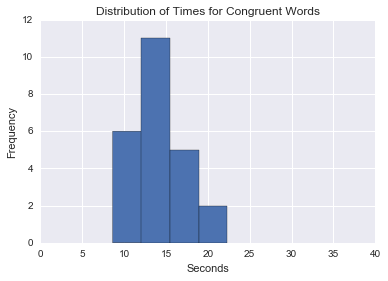

In [9]:
# Histogram for Congruent Words

data.Congruent.hist(bins=4)
plt.xlim(0,40)
plt.ylabel("Frequency")
plt.xlabel("Seconds")
plt.title("Distribution of Times for Congruent Words")

We can see that the distribution for the times from congruent words is positively skewed.

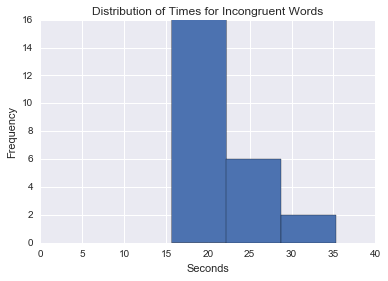

In [10]:
# Histogram for Incongruent Words

data.Incongruent.hist(bins=3)
plt.xlim(0,40)
plt.ylabel("Frequency")
plt.xlabel("Seconds")
plt.title("Distribution of Times for Incongruent Words")

The distribution for the times from incongruent words looks like a positively skewed distribution. Also, compared to the previous histogram, this is shifted to the right, indicating longer times subjects took to finish saying the words with incongruent colors.

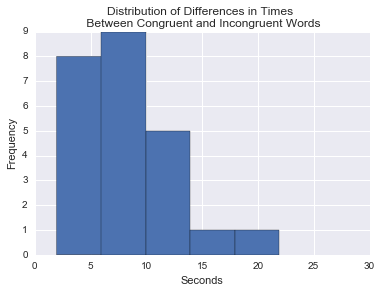

In [11]:
# Histogram for the difference

data.Difference.hist(bins=5)
plt.xlim(0,30)
plt.ylabel("Frequency")
plt.xlabel("Seconds")
plt.title("Distribution of Differences in Times \n Between Congruent and Incongruent Words")

The distribution of the differences between the times for congruent and incongruent words is also positively skewed.

#### t-test

In [12]:
# t-critical value, tc at α = 0.05, df = 23, one-tailed test, positive direction, as determined
# from the t-table

tc = 1.714

In [13]:
# standard error of the mean, SEM

SEM = s_diff / sqrt(n)
SEM

0.9930286347783406

In [14]:
# t-statistic, ts

ts = mean_diff / (s_diff / sqrt(n))
ts

8.020706944109957

#### Since ts > tc, the results are statistically significant at α = 0.05.

#### Therefore, we reject the null hypothesis and accept the alternative hypothesis that the times for incongruent word-color combinations are slower (higher) than the congruent word-color combinations.

##### We also conclude that p < 0.05.

If we calculate the p, it will be:

p = .0001

(Using www.graphpad.com)


I expect the rejection of the null hypothesis. When doing the test on myself, my time for the incongruent words is about twice than that for the congruent words.

#### Cohen's d

In [15]:
d = mean_diff / s_diff
d

1.6372199491222625

This means that the times for the congruent and incongruent words are 1.64 standard errors apart.

#### Correlation measures

In [16]:
r2 = (ts ** 2) / ((ts ** 2) + df)
r2

0.736636416144506

This means that 74% of the difference between the times for congruent and incongruent words can be attributed to the treatment, that is the incongruency of the word spelled with the color the word is printed. I think that is pretty high.

#### Margin of error for 95% confidence interval

In [17]:
# t-critical value at alpha = .025, df = 23

tc2 = 2.069

In [18]:
# margin of error, me

me = tc2 * SEM
me

2.0545762453563867

In [19]:
lower_limit = mean_diff - me
lower_limit

5.91021542131028

In [20]:
upper_limit = mean_diff + me
upper_limit

10.019367912023053

#### Conclusions

Stroop task t-test:

    t(23) = 8.02, p < .05, one-tailed in the positive direction

Confidence interval on the mean difference: 

    95% CI = (5.91 - 10.02)

Effects size:

    Cohen's d = 1.64
    r2 = .74
    
Ho is rejected. 
    

### Answers to Optional Questions

The difference in times was attributed in the literature to "practice". Since the mind is already used to reading and associating what has been read to what the mind has been used to knowing what it is, it is hard to remove this association, and gets in the way of saying what the mind is not used to. Response is automatic once something has already been learned, and it is hard to do something other than that automatic response. 

An alternative similar task that would probably result in a similar effect is when a person who is used to driving in the right lane (for example, US) has to travel to another country where everyone drives in the left lane. The person will probably drive slower because he/she will have to think about whether he/she is driving correctly. 



### References

http://psychclassics.yorku.ca/Stroop/

https://faculty.washington.edu/chudler/java/ready.html

https://en.wikipedia.org/wiki/Stroop_effect

http://www.psytoolkit.org/lessons/stroop.html

